**Exploration and Analysis of US Chronic Health Indictators** <br>
Christopher Luke <br>
2025

Background: This project focuses on converting publicly available CDC data on chronic disease indicators into a **SQLite** database, enabling efficient querying and analysis of US health trends. The workflow demonstrates data handling in the form of:

- **Extraction**: converting Excel CSV file into a structured SQL database

- **Querying**: leveraging SQL to understand the underlying structure of the dataset and isolate distinct health related topics and questions

- **Processing and visualization**: using Python and SQL for real time visualization and data transformations

- **Analysis**: Using SQL to filter data table and rank top subgroups for health topics (e.g., Alcohol, Obesity in Adults, Cardiovascular Disease)

The analysis highlights the most affected subpopulations across years for selected health topics and associated questions, demonstrating the utility of SQL and Python within an investigative workflow.

Libraries Used: <ins>*sqlite3*</ins> - Lightweight, self-contained SQL database engine integrated with Python for storing and querying structured data <br>
<ins>*pandas*</ins> - Open source data analysis tool - useful for organizing data into dataframes
<br>
<ins>*matplotlib*</ins> - Open source visualization tool - useful for creating bar graphs
<br>
<ins>*pprint*</ins> - module for tailoring the display of python objects 
<br>
<br>
Data Source: https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators/hksd-2xuw/about_data

In [228]:
import sqlite3 as sql 
import pandas as pd 
import matplotlib.pyplot as plt
import pprint 

To begin, I convert the CSV file into a pandas DataFrame so that I can write it into a SQL database as a table; I create a database named cdi using the sqlite3 module and establish a cursor object to execute SQL queries. Finally, I use two basic queries to display the first five rows of the table as well as using the count() function to verify the size of the table and that the data was loaded correctly.

In [203]:
file = r'C:\Users\chris\OneDrive\Desktop\USCDI.csv'
df = pd.read_csv(file, low_memory=False)
conn = sql.connect("cdi.db")
cursor = conn.cursor()
df.to_sql("cdi", conn, if_exists="replace", index=False)
conn.commit()
testdf = pd.read_sql_query("SELECT * FROM cdi Limit 5", conn)
pd.set_option('display.max_columns', None)
display(testdf)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2020,2020,US,United States,BRFSS,Health Status,Recent activity limitation among adults,None,Number,Age-adjusted Mean,2.9,2.9,None,None,2.8,2.9,Sex,Female,None,None,None,None,None,59,HEA,HEA04,None,AGEADJMEAN,SEX,SEXF,None,None,None,None
1,2015,2019,AR,Arkansas,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",None,Number,Number,"9,537","9,537",None,None,None,None,Sex,Male,None,None,None,None,POINT (-92.27449074299966 34.74865012400045),5,CAN,CAN07,None,NMBR,SEX,SEXM,None,None,None,None
2,2015,2019,CA,California,US Cancer DVT,Cancer,"Cervical cancer mortality among all females, u...",None,Number,Number,486,486,None,None,None,None,Overall,Overall,None,None,None,None,POINT (-120.99999953799971 37.63864012300047),6,CAN,CAN03,None,NMBR,OVERALL,OVR,None,None,None,None
3,2015,2019,CO,Colorado,US Cancer DVT,Cancer,"Invasive cancer (all sites combined), incidence",None,Number,Number,"2,880","2,880",None,None,None,None,Race/Ethnicity,Hispanic,None,None,None,None,POINT (-106.13361092099967 38.843840757000464),8,CAN,CAN07,None,NMBR,RACE,HIS,None,None,None,None
4,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Prostate cancer mortality among all males, und...",None,Number,Number,519,519,None,None,None,None,Race/Ethnicity,"White, non-Hispanic",None,None,None,None,POINT (-83.62758034599966 32.83968109300048),13,CAN,CAN05,None,NMBR,RACE,WHT,None,None,None,None


In [204]:
sizecheck = """SELECT COUNT(*) FROM cdi"""
cursor.execute(sizecheck)
display(cursor.fetchall())
colnames = testdf.columns.to_list()
display(colnames, len(colnames))

[(309215,)]

['YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'Topic',
 'Question',
 'Response',
 'DataValueUnit',
 'DataValueType',
 'DataValue',
 'DataValueAlt',
 'DataValueFootnoteSymbol',
 'DataValueFootnote',
 'LowConfidenceLimit',
 'HighConfidenceLimit',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'StratificationCategory3',
 'Stratification3',
 'Geolocation',
 'LocationID',
 'TopicID',
 'QuestionID',
 'ResponseID',
 'DataValueTypeID',
 'StratificationCategoryID1',
 'StratificationID1',
 'StratificationCategoryID2',
 'StratificationID2',
 'StratificationCategoryID3',
 'StratificationID3']

34

The table consists of nearly 300k rows and 34 columns worth of information.

Understandably, this is an enormous amount of information and there are many approaches one may take to try and make sense of it all - my approach towards understanding the table will prioritize simplifying the information by removing duplicates and isolating distinct values found within each column - hopefully identifying trends and patterns in the dataset. Due to uncertainty regarding the size of the output I'm going to limit the entries to the first 20 distinct values per column for viewing purposes.

In [247]:
distinct_values_dict = dict()
for col in colnames:
    query = f"SELECT DISTINCT {col} FROM cdi"
    cursor.execute(query)
    rows = cursor.fetchall()
    distinct_values_dict[col] = [row[0] for row in rows][:20]
pprint.pp(distinct_values_dict, compact = True, width = 120)

{'YearStart': [2020, 2015, 2016, 2018, 2019, 2021, 2022],
 'YearEnd': [2020, 2019, 2021, 2022],
 'LocationAbbr': ['US', 'AR', 'CA', 'CO', 'GA', 'KS', 'ME', 'NJ', 'NY', 'OR', 'SD', 'TX', 'VT', 'WV', 'WI', 'ID', 'WY',
                  'AZ', 'DC', 'FL'],
 'LocationDesc': ['United States', 'Arkansas', 'California', 'Colorado', 'Georgia', 'Kansas', 'Maine', 'New Jersey',
                  'New York', 'Oregon', 'South Dakota', 'Texas', 'Vermont', 'West Virginia', 'Wisconsin', 'Idaho',
                  'Wyoming', 'Arizona', 'District of Columbia', 'Florida'],
 'DataSource': ['BRFSS', 'US Cancer DVT', 'NVSS', 'NSCH', 'YRBSS', 'PRAMS', 'Current Population Survey - FSS', 'USRDS',
                'ACS', 'CMS Part A Claims Data', 'AEDS', 'NIS', 'ANRF', 'WIC Participant and Program Characteristics'],
 'Topic': ['Health Status', 'Cancer', 'Diabetes', 'Sleep', 'Immunization',
           'Nutrition, Physical Activity, and Weight Status', 'Oral Health', 'Arthritis', 'Asthma',
           'Cardiovascul

While the dictionary of distinct values is much smaller than the parent table, it still contains too many values to immediately find what is important, at least at a surface glance. Instead, I will narrow my investigation to columns pertaining to health topics and their associated questions; I'm choosing this approach because I know my dataset is concerned with chronic disease indictators, and so logically the columns associated with this sort of information may be the backbone structure that other information revolves around. 

To visualize the structure, I use an approach which utilizes two sql queries, the first to select distinct values from the topic column and place them in a list, and the second contained within a for loop which iterates through the values in that list and selects distinct questions from rows filtered for that distinct topic, with the final combination being stored in a python dictionary.

In [192]:
distinct_health_topic = "SELECT DISTINCT Topic FROM cdi"
cursor.execute(distinct_health_topic)
distinct_health_topic = [item[0] for item in cursor.fetchall()]
display(distinct_health_topic)

['Health Status',
 'Cancer',
 'Diabetes',
 'Sleep',
 'Immunization',
 'Nutrition, Physical Activity, and Weight Status',
 'Oral Health',
 'Arthritis',
 'Asthma',
 'Cardiovascular Disease',
 'Disability',
 'Mental Health',
 'Tobacco',
 'Alcohol',
 'Chronic Obstructive Pulmonary Disease',
 'Social Determinants of Health',
 'Cognitive Health and Caregiving',
 'Chronic Kidney Disease',
 'Maternal Health']

In [254]:
topic_questions = dict()
for health_topic in distinct_health_topic:
    query = """
    SELECT DISTINCT Question FROM cdi WHERE Topic = ?
    """
    cursor.execute(query, (health_topic,))
    topic = cursor.fetchall()
    topic_questions[health_topic] = [item[0] for item in topic]

pprint.pp(topic_questions, compact = True, width = 120)

{'Health Status': ['Recent activity limitation among adults', 'Frequent physical distress among adults',
                   'Life expectancy at birth', 'Fair or poor self-rated health status among adults',
                   'Average recent physically unhealthy days among adults',
                   '2 or more chronic conditions among adults'],
 'Cancer': ['Invasive cancer (all sites combined), incidence',
            'Cervical cancer mortality among all females, underlying cause',
            'Prostate cancer mortality among all males, underlying cause',
            'Breast cancer mortality among all females, underlying cause',
            'Invasive cancer (all sites combined) mortality among all people, underlying cause',
            'Lung and bronchial cancer mortality among all people, underlying cause',
            'Colon and rectum (colorectal) cancer mortality among all people, underlying cause',
            'Mammography use among women aged 50-74 years', 'Cervical cancer screen

This simplified approach already makes the information easier to comprehend. It appears that health topics (eg., Health Status, Diabetes, Oral Health) may have questions associated with it that help to stratify the population into subgroups based on factors such as age, gender, behavior, and unique life circumstances for that respective topic (eg., Topic - Mental Health, Question - Depression among adults). This structure gives me a method for performing some targeted statistical analysis — by filtering the dataset according to a specific health topic and associated question, I can identify subgroup related patterns for that topic and question and generate insights that would otherwise remain hidden in the overall data. But what topics and questions should I focus on? As valuable as it would be to perform an extensive analysis on every health topic and question combination, that effort would be better suited for a larger scale project. For the sake of focus and feasibility, I will instead select three topic/question combinations using a randomized approach, ensuring that my analysis remains unbiased.

In [218]:
import random
randomd = dict()
for i in range(3):
    rtopic = (random.choice(list(topic_questions.keys())))
    rquestion = random.choice(list(topic_questions[rtopic]))
    randomd[rtopic] = rquestion
display(randomd)

{'Asthma': 'Current asthma among adults',
 'Social Determinants of Health': 'Unable to pay mortgage, rent, or utility bills in the past 12 months among adults',
 'Cancer': 'Colon and rectum (colorectal) cancer mortality among all people, underlying cause'}

Disclaimer: The code above will generate a new set of topic/question combinations each instance - it is included for demonstration purposes. For the sake of continuity and reproducibility I have generated a static dictionary below containing the health topic/question combinations created the first instance the code was run.

In [219]:
tq_for_analysis = {
    ('Disability',):('Adults with any disability',),
    ('Nutrition, Physical Activity, and Weight Status',): ('Obesity among adults',),
    ('Alcohol',): ('Binge drinking frequency among adults who binge drink',) 
}
display(tq_for_analysis)

{('Disability',): ('Adults with any disability',),
 ('Nutrition, Physical Activity, and Weight Status',): ('Obesity among adults',),
 ('Alcohol',): ('Binge drinking frequency among adults who binge drink',)}

While I have narrowed in on an investigative strategy, analyzing additional dimensions with respect to these topics and questions may provide further valuable insights. I plan to examine distinct values across temporal (YearStart, YearEnd), spatial (LocationDesc), measurement (DataValueUnit, DataValueType), and stratification (StratificationCategoryID1, StratificationID1) attributes. Using a similar approach as before, I will iterate through these attributes, retrieve their distinct values via SQL queries, and store all combinations in a structured dictionary for subsequent analysis.

In [253]:
analysis_cols = ['YearStart','YearEnd','LocationDesc', 'DataValueUnit', 'DataValueType', 'StratificationCategoryID1', 'StratificationID1']
overalld = dict()
for k,v in tq_for_analysis.items():
    k = k[0]
    v = v[0]
    overalld[k] = dict()
    overalld[k]["Question"] = v
    for col in analysis_cols:
        distinct_query = f" SELECT DISTINCT {col} FROM cdi WHERE Topic = ? AND Question = ?"
        cursor.execute(distinct_query, (k,v))
        overalld[k][col] = [item[0] for item in cursor.fetchall()]
pprint.pp(overalld, compact = True, width = 120)
    

{'Disability': {'Question': 'Adults with any disability',
                'YearStart': [2019, 2020, 2021, 2022],
                'YearEnd': [2019, 2020, 2021, 2022],
                'LocationDesc': ['Alabama', 'Alaska', 'Georgia', 'Iowa', 'Kentucky', 'Maine', 'Montana', 'Nebraska',
                                 'New York', 'Rhode Island', 'Texas', 'Delaware', 'Michigan', 'Minnesota', 'New Mexico',
                                 'Pennsylvania', 'Virgin Islands', 'Connecticut', 'Ohio', 'Maryland', 'Mississippi',
                                 'United States', 'Vermont', 'West Virginia', 'Wisconsin', 'Colorado',
                                 'District of Columbia', 'Florida', 'Missouri', 'North Dakota', 'Puerto Rico',
                                 'Tennessee', 'Virginia', 'Oklahoma', 'Arizona', 'Arkansas', 'California', 'Guam',
                                 'Hawaii', 'Idaho', 'Indiana', 'Kansas', 'Illinois', 'Louisiana', 'New Hampshire',
                                 'M

Now we have both the big picture and a finer resolution. The dictionary reveals key patterns in the dataset: for these topic–question combinations, locations cover all U.S. states and territories, and information is provided over multiple years (2019–2022), enabling recent multi-year comparisons. Data values include metrics such as crude and age-adjusted prevalence or medians, with units reflecting percentages or raw counts. Stratification captures various subgroups, providing detailed breakdowns while also including overall metrics that establish a baseline for meaningful comparisons across populations. This structure allows the analysis to focus on the relative difference between each subgroup and the overall population metric for a given year and location, highlighting the subgroups that deviate most from the state-level average.

To operationalize this comparison, SQL queries were used to first extract the overall values for each state, year, and measurement type. The query leverages common table expressions (CTEs) to organize the overall values and joins them back to the subgroup data, effectively performing a self-join. A window function (RANK) is applied within each combination of year, state, and data type to identify the top 10 subgroups with the largest deviations. This approach ensures the analysis focuses on the most pronounced disparities rather than treating all subgroup values equally. Storing these results in a structured dictionary enables rapid exploration of which subgroups consistently deviate most from the state-level averages, supporting a focused and actionable analysis of population-level differences.

In [255]:
dfdict = dict()
for k,v in tq_for_analysis.items():
    k = k[0]
    v = v[0]
    param = (k,v,k,v)
    strat_vs_overall_stats_per_state = """
    WITH overall AS (
    SELECT * 
    FROM cdi 
    WHERE Topic = ? 
      AND Question = ? 
      AND StratificationCategoryID1 = 'OVERALL'
    ),
    joined AS (
    SELECT 
        cdi.*, 
        overall.DataValue AS StateOverall, 
        cdi.DataValue - overall.DataValue AS Difference,
        RANK() OVER(
            PARTITION BY cdi.YearStart, cdi.YearEnd, cdi.DataValueType
            ORDER BY cdi.DataValue - overall.DataValue DESC
        ) AS Rank
    FROM cdi
    JOIN overall
      ON cdi.YearStart = overall.YearStart 
     AND cdi.YearEnd = overall.YearEnd 
     AND cdi.LocationDesc = overall.LocationDesc 
     AND cdi.DataValueType = overall.DataValueType
    WHERE cdi.Topic = ? 
      AND cdi.Question = ?
    )
    SELECT * 
    FROM joined
    WHERE Rank <= 10
   
    """ 
    dfdict[k,v] = pd.read_sql_query(strat_vs_overall_stats_per_state, conn, params = param)
for k,v in dfdict.items():
    display(v.head(3))

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,StateOverall,Difference,Rank
0,2019,2019,MO,Missouri,BRFSS,Disability,Adults with any disability,None,%,Age-adjusted Prevalence,65.6,65.6,None,None,49.8,78.6,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",None,None,None,None,POINT (-92.56630005299968 38.635790776000476),29,DIS,DIS01,None,AGEADJPREV,RACE,AIAN,None,None,None,None,29.9,35.7,1
1,2019,2019,ME,Maine,BRFSS,Disability,Adults with any disability,None,%,Age-adjusted Prevalence,55.6,55.6,None,None,38.4,71.5,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",None,None,None,None,POINT (-68.98503133599962 45.254228894000505),23,DIS,DIS01,None,AGEADJPREV,RACE,AIAN,None,None,None,None,29.8,25.8,2
2,2019,2019,IN,Indiana,BRFSS,Disability,Adults with any disability,None,%,Age-adjusted Prevalence,53.4,53.4,None,None,38.7,67.5,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",None,None,None,None,POINT (-86.14996019399968 39.766910452000445),18,DIS,DIS01,None,AGEADJPREV,RACE,AIAN,None,None,None,None,27.7,25.7,3


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,StateOverall,Difference,Rank
0,2019,2019,AR,Arkansas,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,None,%,Age-adjusted Prevalence,66,66,None,None,51.3,78.2,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",None,None,None,None,POINT (-92.27449074299966 34.74865012400045),5,NPAW,NPW14,None,AGEADJPREV,RACE,AIAN,None,None,None,None,38,28.0,1
1,2019,2019,HI,Hawaii,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,None,%,Age-adjusted Prevalence,50.4,50.4,None,None,46.1,54.7,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",None,None,None,None,POINT (-157.85774940299973 21.304850435000446),15,NPAW,NPW14,None,AGEADJPREV,RACE,HAPI,None,None,None,None,25.5,24.9,2
2,2019,2019,AZ,Arizona,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,None,%,Age-adjusted Prevalence,56.5,56.5,None,None,49.2,63.5,Race/Ethnicity,"American Indian or Alaska Native, non-Hispanic",None,None,None,None,POINT (-111.76381127699972 34.865970280000454),4,NPAW,NPW14,None,AGEADJPREV,RACE,AIAN,None,None,None,None,31.9,24.6,3


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,StateOverall,Difference,Rank
0,2019,2019,FL,Florida,BRFSS,Alcohol,Binge drinking frequency among adults who bing...,None,Number,Crude 75th percentile,7.2,7.2,None,None,4.3,11.3,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,POINT (-81.92896053899966 28.932040377000476),12,ALC,ALC04,None,CRD75TH,RACE,MRC,None,None,None,None,4.4,2.8,1
1,2019,2019,MN,Minnesota,BRFSS,Alcohol,Binge drinking frequency among adults who bing...,None,Number,Crude 75th percentile,5.9,5.9,None,None,4.1,10.5,Race/Ethnicity,"Multiracial, non-Hispanic",None,None,None,None,POINT (-94.79420050299967 46.35564873600049),27,ALC,ALC04,None,CRD75TH,RACE,MRC,None,None,None,None,3.8,2.1,2
2,2019,2019,AR,Arkansas,BRFSS,Alcohol,Binge drinking frequency among adults who bing...,None,Number,Crude 75th percentile,7.6,7.6,None,None,5,9.4,Race/Ethnicity,"Black, non-Hispanic",None,None,None,None,POINT (-92.27449074299966 34.74865012400045),5,ALC,ALC04,None,CRD75TH,RACE,BLK,None,None,None,None,5.5,2.1,3


Following the collection of results into the dictionary, vertical bar charts were created to visualize the top 10 relative differences for each topic/question combination. For each subset, the most frequently occurring metric was selected to standardize comparisons across locations and years, and only the latest year of data was used for each graph. Subgroups were then ranked by their difference from the overall population metric, and the top 10 deviations were displayed as vertical bars. Each bar represents a specific subgroup and location, with the height corresponding to the magnitude of deviation from the state-level average.

These visualizations enable rapid identification of which subgroups consistently deviate most from the overall population metric, highlighting potential disparities across states. By combining the dictionary structure with these vertical bar charts, the analysis becomes both data-driven and interpretable, allowing for immediate exploration of patterns without rerunning complex queries. The inclusion of year and metric in the plot titles provides full context for each visualization, making it easy to compare trends across different measurement types.

In [256]:
chosen_metrics = {}
for (topic, question), df in dfdict.items():
    most_common_metric = df['DataValueType'].mode()[0]
    chosen_metrics[(topic, question)] = most_common_metric
display(chosen_metrics)

{('Disability', 'Adults with any disability'): 'Age-adjusted Prevalence',
 ('Nutrition, Physical Activity, and Weight Status',
  'Obesity among adults'): 'Crude Prevalence',
 ('Alcohol',
  'Binge drinking frequency among adults who binge drink'): 'Crude 75th percentile'}

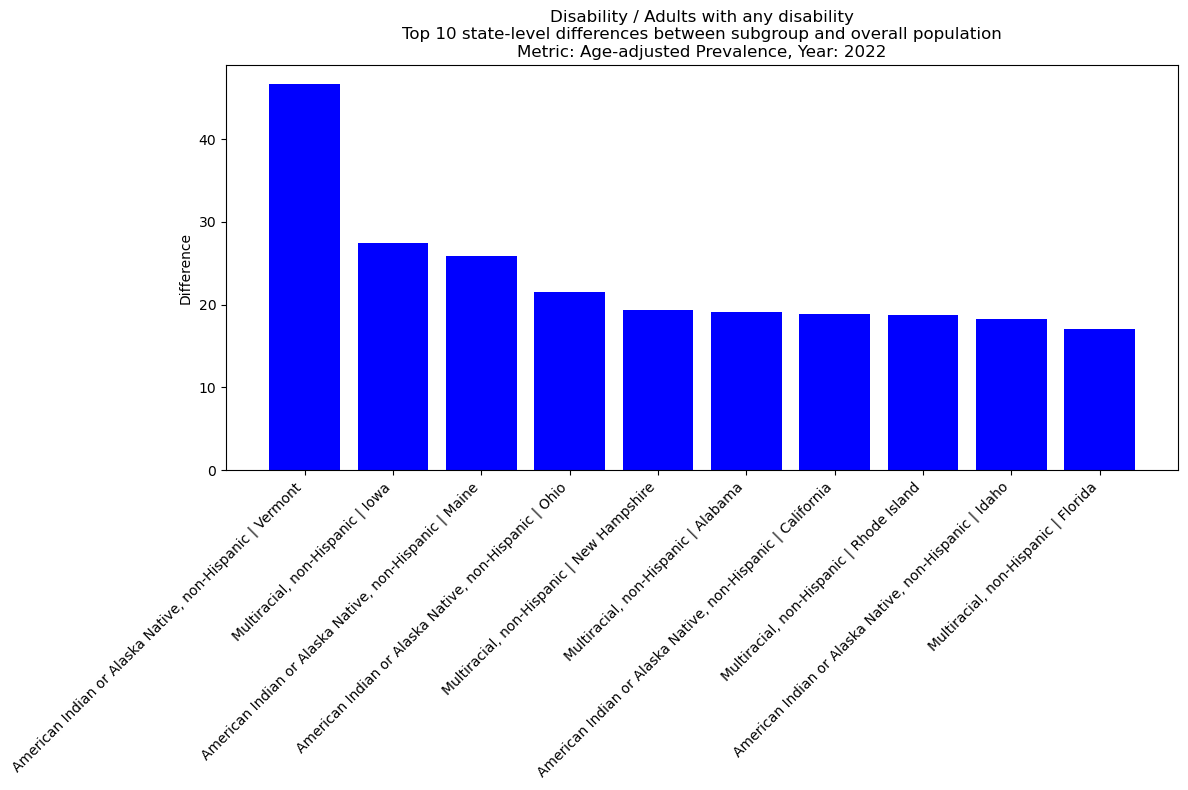

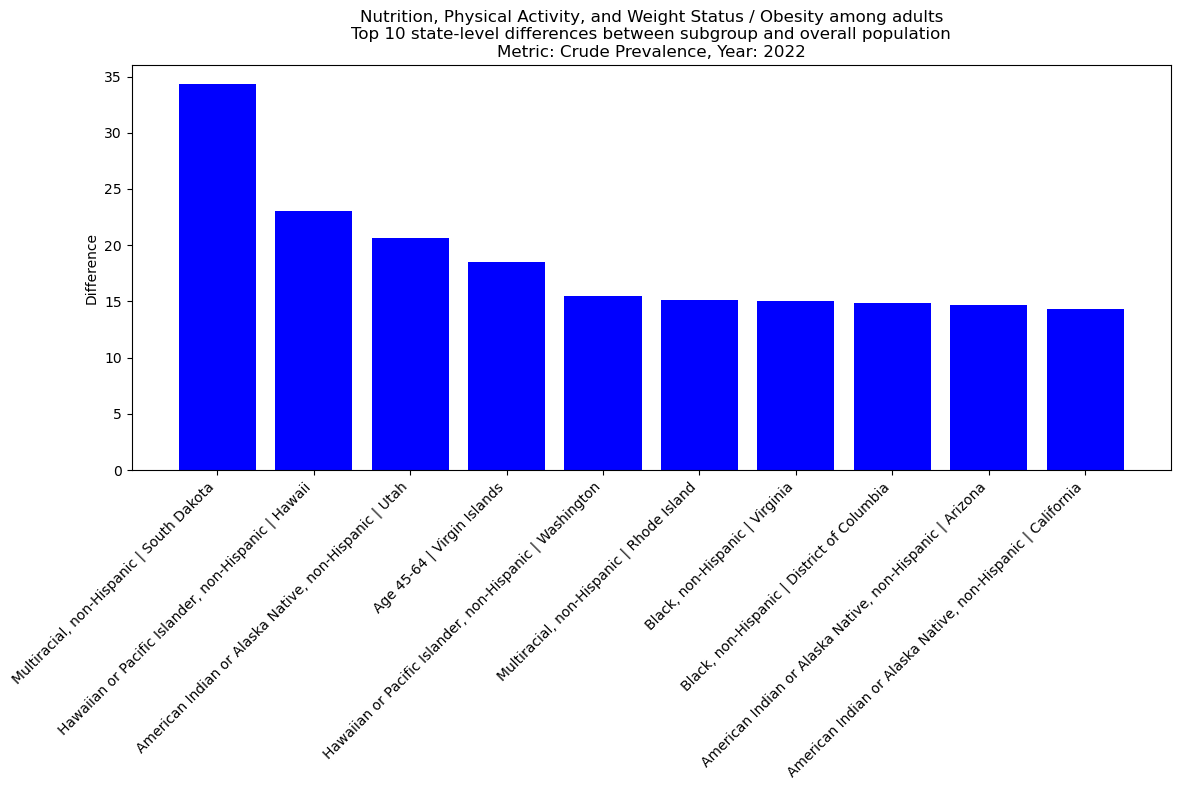

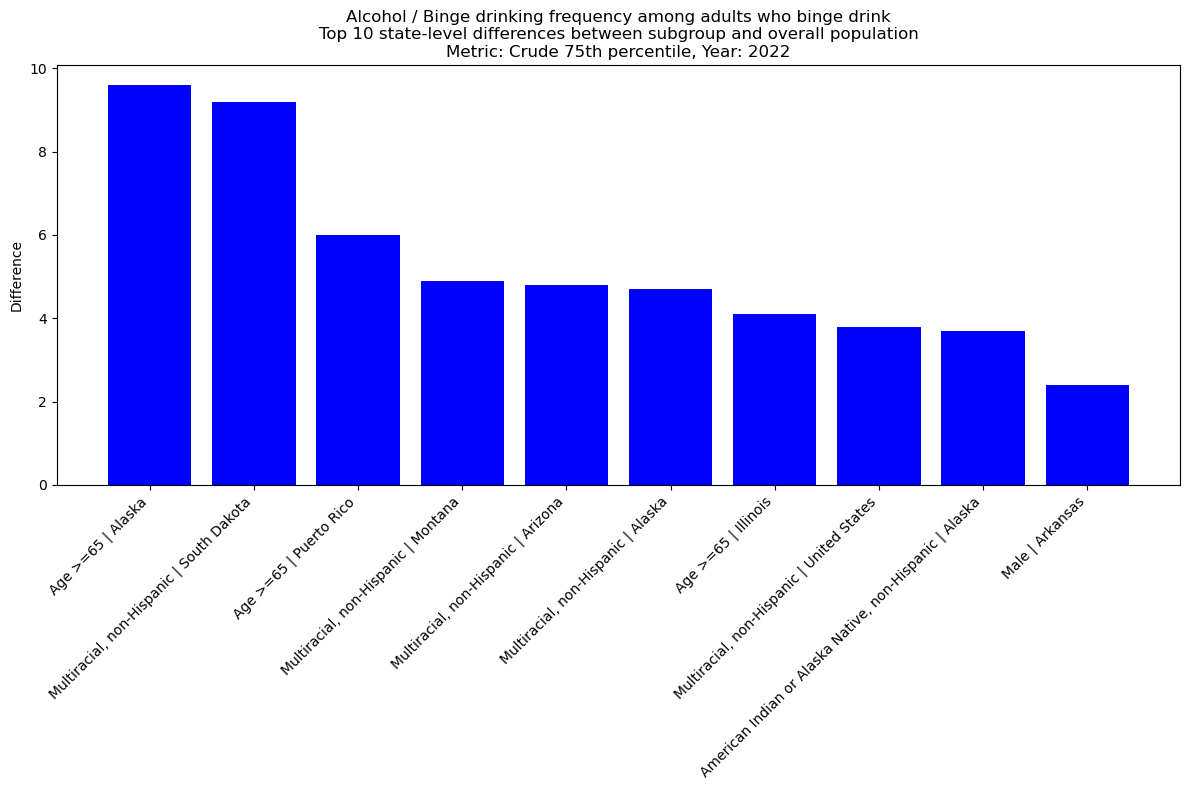

In [257]:
top10 = dict()

for (topic, question), df in dfdict.items():
    latest_year = df['YearEnd'].max()
    metric = chosen_metrics[(topic, question)]
    df_filtered = df[(df['YearEnd'] == latest_year) & (df['DataValueType'] == metric)]
    df_top10 = df_filtered.sort_values('Difference', ascending=False).head(10).copy()
    df_top10['Label'] = (df_top10['Stratification1'] + " | " + df_top10['LocationDesc']).str[:30]
    top10[(topic, question)] = df_top10

for (topic, question), df_top10 in top10.items():
    df_top10['Label'] = df_top10['Stratification1'] + " | " + df_top10['LocationDesc']
    year = df_top10['YearEnd'].iloc[0]
    metric = df_top10['DataValueType'].iloc[0]
    
    plt.figure(figsize=(12, 8))
    plt.bar(df_top10['Label'], df_top10['Difference'], color='blue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Difference')
    plt.title(f"{topic} / {question}\nTop 10 state-level differences between subgroup and overall population\nMetric: {metric}, Year: {year}")
    plt.tight_layout()
    plt.show()


So here we have it: the top 10 differences between subgroup and overall population with respect to location and year for the most common metric across selected health topics and questions. Without delving into a high-level analysis of causes, these visualizations make disparities immediately clear, highlighting populations that deviate significantly from overall state averages. While a good initial comparison model, it is important to note that relative differences may be understated or overstated in states with unusually low or high overall values—meaning that issues affecting certain subgroups may still go unnoticed depending on overall metrics. This analysis serves as a solid first look upon which more extensive investigation can be layered.

As outlined in the introduction, this project demonstrates the practical use of SQL to filter, join, and create actionable tables from large datasets, combined with Python to generate real-time visualizations and handle computational tasks, turning complex public health data into understandable insights. As a workflow, it provides a strong foundation for further analysis, exploration, or targeted intervention planning.

In [200]:
cursor.close()
conn.close()